## Dependencias

In [1]:
from functools import reduce
from itertools import combinations

import cufflinks as cf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from auxiliares import freq, normalizar
from scikitplot.metrics import plot_roc
from sklearn.decomposition import PCA 
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.linear_model import PassiveAggressiveClassifier, Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV,
                                     train_test_split)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from varclushi import VarClusHi

cf.go_offline()



### Explicacion de algunas partes de las dependecnias 
from scikitplot.metrics import plot_roc

* plot_roc --> Esta función se utiliza para trazar la curva ROC (Receiver Operating Characteristic), la función "plot_roc" de "scikitplot.metrics" es una herramienta útil para evaluar el rendimiento de modelos de clasificación binaria y para comparar varios modelos entre sí 

---
from sklearn.


* from sklearn.decomposition import PCA --> a clase "PCA" de scikit-learn es una herramienta útil para reducir la dimensionalidad de un conjunto de datos, lo que puede ayudar a acelerar el entrenamiento de modelos de aprendizaje automático y mejorar la interpretación de los resultados.

* from sklearn.feature_selection import SelectKBest, VarianceThreshold -->  estas dos clases de scikit-learn son herramientas útiles para realizar selección de características en un conjunto de datos. "SelectKBest" selecciona las K mejores características utilizando una estrategia de evaluación univariante, mientras que "VarianceThreshold" elimina las características con baja varianza. Estas técnicas pueden ayudar a reducir la dimensionalidad del conjunto de datos y mejorar la eficiencia y precisión del modelo de aprendizaje automático.

* from sklearn.linear_model import PassiveAggressiveClassifier, Perceptron --> ambas clases de scikit-learn son útiles para la clasificación binaria en problemas de aprendizaje automático. "PassiveAggressiveClassifier" utiliza un enfoque de aprendizaje en línea para manejar datos cambiantes, mientras que "Perceptron" utiliza un algoritmo iterativo para ajustar los pesos y el umbral y lograr la precisión deseada en la clasificación

* from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score --> estas tres funciones de scikit-learn son herramientas útiles para evaluar la precisión y el rendimiento de modelos de clasificación. "accuracy_score" calcula la precisión, "confusion_matrix" muestra la matriz de confusión y "roc_auc_score" utiliza la curva ROC y el AUC para evaluar el rendimiento de modelos de clasificación binaria

* from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV, train_test_split)  --> estas tres clases/funiones de scikit-learn son herramientas útiles para ajustar y evaluar modelos de aprendizaje automático. "GridSearchCV" y "RandomizedSearchCV" son útiles para buscar los mejores hiperparámetros para un modelo, mientras que "train_test_split" se utiliza para dividir el conjunto de datos en conjuntos de entrenamiento y prueba para evaluar el modelo.

* from sklearn.pipeline import make_pipeline --> La función "make_pipeline" es una herramienta que se utiliza para construir una tubería (pipeline) de transformación y modelado de datos en scikit-learn. Una tubería es un conjunto de pasos que se aplican secuencialmente a los datos, la función "make_pipeline" es una herramienta útil para construir tuberías de transformación y modelado de datos en scikit-learn. Permite combinar de manera sencilla diferentes transformadores y modelos en una única tubería secuencial

* from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler --> "MinMaxScaler" es una clase que se utiliza para transformar los datos de manera que se ajusten a un rango específico. Esta clase escala los valores de las características (columnas) del conjunto de datos a un rango de 0 a 1. Esto se hace restando el valor mínimo de cada característica y dividiendo por la diferencia entre el valor máximo y mínimo de cada característica.

--"OneHotEncoder" es una clase que se utiliza para transformar variables categóricas en variables numéricas que se pueden utilizar para entrenar modelos de aprendizaje automático. Esta clase crea una variable binaria (con valor 0 o 1) para cada categoría en la variable categórica original.

--"StandardScaler" es una clase que se utiliza para estandarizar los datos de tal manera que tengan una media de cero y una desviación estándar de uno. Esta clase escala los valores de las características del conjunto de datos de manera que tengan una media de cero y una desviación estándar de uno.

--En resumen, estas tres clases de scikit-learn son herramientas útiles para la preprocesamiento de datos en aprendizaje automático. "MinMaxScaler" escala los valores de las características en un rango específico, "OneHotEncoder" transforma variables categóricas en variables numéricas y "StandardScaler" estandariza los datos de tal manera que tengan una media de cero y una desviación estándar de uno.

* from sklearn.svm import SVC -->  la clase "SVC" de scikit-learn es una herramienta útil para entrenar modelos de SVM para clasificación y regresión en aprendizaje automático.


---

varclushi

* from varclushi import VarClusHi --> , la clase "VarClusHi" del paquete "varclushi" es una herramienta útil para reducir la dimensionalidad y encontrar grupos de variables altamente correlacionadas en un conjunto de datos. La herramienta utiliza un enfoque de clustering jerárquico que se basa en la correlación entre las variables y utiliza una técnica de análisis de correlación parcial para mejorar la calidad de los clústeres


---

import cufflinks as cf

* import cufflinks as cf --> Cufflinks es una biblioteca de visualización que se utiliza junto con la biblioteca Plotly para crear gráficos interactivos en línea. Con cufflinks, es posible crear gráficos en línea utilizando los mismos métodos familiares de pandas para la manipulación de datos. Cufflinks convierte los gráficos creados en pandas en gráficos interactivos de Plotly que pueden ser compartidos y visualizados en línea

---
 functools import reduce

* from functools import reduce --> La función reduce toma dos argumentos: la función que se aplicará a los elementos de la secuencia y la secuencia en sí. La función debe tomar dos argumentos y devolver un valor, y reduce aplicará la función a los primeros dos elementos de la secuencia, luego aplicará la función al resultado y al siguiente elemento de la secuencia, y así sucesivamente hasta que se procesen todos los elementos de la secuencia.

---
intertools import combinatios 

* from itertools import combinations --> Esta función devuelve todas las combinaciones posibles de elementos de una secuencia dada en grupos de un tamaño determinado. Por ejemplo, si tenemos una lista [1, 2, 3] y queremos obtener todas las combinaciones posibles de elementos en grupos de tamaño 2, podemos llamar a la función "combinations" , que se utiliza para obtener todas las combinaciones posibles de elementos de una secuencia en grupos de un tamaño determinado

## Lectura de datos

In [2]:
ruta = "C:/Users/oscar/Downloads/anime_cleaned/anime_cleaned.csv" # Ruta del dataset

In [3]:
df = pd.read_csv(ruta)  # Aqui por que es forma csv tambien se podria xlsx etc 
df.head()               # mostrar los primeros 5 datos

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012.0
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0,2007.0
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.0,2008.0
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0,2002.0
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",24.0,2012.0


In [4]:
pd.set_option('display.max_colwidth', None) # Para que no me corte los textos, máximo ancho en caracteres de cada una de las columnas, en el caso de que el contenido de alguna supere este valor se truncará el contenido a mostrar, su valor por defecto es de 50
pd.set_option('display.max_columns', None) # Para que no me corte las columnas

In [5]:
df.sample() # muestra un dato aleatorio -> ya que llamamos a nuestros datos un dataframe osea df y le decimos que nos muestre un dato aleatorio

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
367,2164,Dennou Coil,Den-noh Coil,電脳コイル,"Cyber Coil, Coil - A Circle of Children, Denno Coil",https://myanimelist.cdn-dena.com/images/anime/5/12844.jpg,TV,Original,26,Finished Airing,False,"May 12, 2007 to Dec 1, 2007","{'from': '2007-05-12', 'to': '2007-12-01'}",25 min. per ep.,G - All Ages,8.15,29243,367.0,902,95553,1333,One of the awards won by the series was the Seiun Award in 2008 for the Best Dramatic Presentation category.,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 11424, 'type': 'manga', 'url': 'https://myanimelist.net/manga/11424/Dennou_Coil', 'title': 'Dennou Coil'}, {'mal_id': 25525, 'type': 'manga', 'url': 'https://myanimelist.net/manga/25525/Dennou_Coil', 'title': 'Dennou Coil'}], 'Summary': [{'mal_id': 13955, 'type': 'anime', 'url': 'https://myanimelist.net/anime/13955/Dennou_Coil_Recaps', 'title': 'Dennou Coil Recaps'}]}","Bandai Visual, NHK, Tokuma Shoten",Maiden Japan,Madhouse,"Adventure, Comedy, Drama, Mystery, Sci-Fi","['""Prism (プリズム)"" by Ayako Ikeda']","['""Sora no Kakera (空の欠片; A Fragment of the Sky)"" by Ayako Ikeda']",25.0,2007.0


## Definición de variables

In [6]:
varc = ['episodes','members','score','scored_by','favorites','aired_from_year','duration_min'] # variables continuas
vard = ['rating','status','type','source','producer','studio','genre'] # variables discretas
um = ['anime_id','title','title_english'] # variables de identificación
# no usamos todas las variables del dataset, solo las que nos interesan

In [7]:
df = df[um+varc+vard] # reordenamos las columnas

In [8]:
df.sample(3) # muestra 3 datos aleatorios

,anime_id,title,title_english,episodes,members,score,scored_by,favorites,aired_from_year,duration_min,rating,status,type,source,producer,studio,genre
5076,27387,Under the Dog,NaN,1,37480,6.40,16214,62,2016.0,38.0,R+ - Mild Nudity,Finished Airing,OVA,Original,NaN,"Kinema Citrus, Orange","Action, Sci-Fi, Thriller"
6641,35817,Curry no Kuni no Coburoux,NaN,13,63,6.57,7,0,2004.0,4.0,G - All Ages,Finished Airing,TV,Original,"Kids Station, DAX Production",Artland,Comedy
3470,2390,Hoshi no Kirby,Kirby: Right Back at Ya!,100,14308,6.74,6316,133,2001.0,24.0,PG - Children,Finished Airing,TV,Game,"CBC, Nintendo",Studio Sign,"Action, Adventure, Comedy, Parody, Fantasy"


In [9]:
df['target'] = (df['score']>=8)*1 # creamos una nueva variable target, que es 1 si el score es mayor o igual a 8 y 0 si no lo es

In [10]:
varc.remove('score') # eliminamos la variable score de las variables continuas
df.drop('score',axis=1,inplace=True) # eliminamos la variable score del dataset


## Partición de datos

In [11]:
train,valid = train_test_split(df, test_size = 0.3) # dividimos el dataset en train y valid
train.reset_index(drop = True, inplace = True) # reseteamos los indices
valid.reset_index(drop = True, inplace = True) # reseteamos los indices
train.shape,valid.shape  # vemos el tamaño de cada uno

((4667, 17), (2001, 17))

## Análisis Exploratorio de Datos

### Continuo

#### Ausentes

In [12]:
train[varc].isnull().sum()/len(train) # vemos el porcentaje de valores nulos de cada variable continua(son 0.0 por que no hay eso es bueno) 

episodes           0.0
members            0.0
scored_by          0.0
favorites          0.0
aired_from_year    0.0
duration_min       0.0
dtype: float64

#### Varianza de las variables continuas

In [13]:
vt = VarianceThreshold() # creamos un objeto de la clase VarianceThreshold (elimina las variables con varianza 0)

vt.fit(train[varc]) # ajustamos el objeto a las variables continuas del dataset de train (vt es un objeto de la clase VarianceThreshold)

varc = np.array(varc)[vt.get_support()].tolist() # obtenemos las variables continuas que tienen varianza mayor a 0 y las guardamos en una lista

len(varc),varc # vemos el numero de variables continuas que quedaron y las variables continuas que quedaron (son 7)

(6,
 ['episodes',
  'members',
  'scored_by',
  'favorites',
  'aired_from_year',
  'duration_min'])

#### Multicolinealidad

In [14]:
vc = VarClusHi(df=train,feat_list=varc).varclus() # creamos un objeto de la clase VarClusHi (elimina las variables con correlación alta) 
                                                  # y ajustamos el objeto a las variables continuas del dataset de train


In [15]:
vc.rsquare # vemos el valor de R2 de cada variable continua (son 0.0 por que no hay eso es bueno) 

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,members,0.943609,0.003918,0.056613
1,0,scored_by,0.949637,0.001819,0.050454
2,0,favorites,0.797282,0.000218,0.202762
3,0,episodes,0.021562,0.000833,0.979254
4,1,aired_from_year,0.600118,0.007866,0.403052
5,1,duration_min,0.600118,0.000630,0.400134


In [16]:
best = sorted(vc.rsquare.sort_values(by=['Cluster','RS_Ratio']).groupby('Cluster').first()['Variable'])
# obtenemos las variables continuas que tienen menor correlación entre ellas y las guardamos en una lista (best)

#### Extremos

array([[<AxesSubplot: title={'center': 'duration_min'}>,
        <AxesSubplot: title={'center': 'scored_by'}>]], dtype=object)

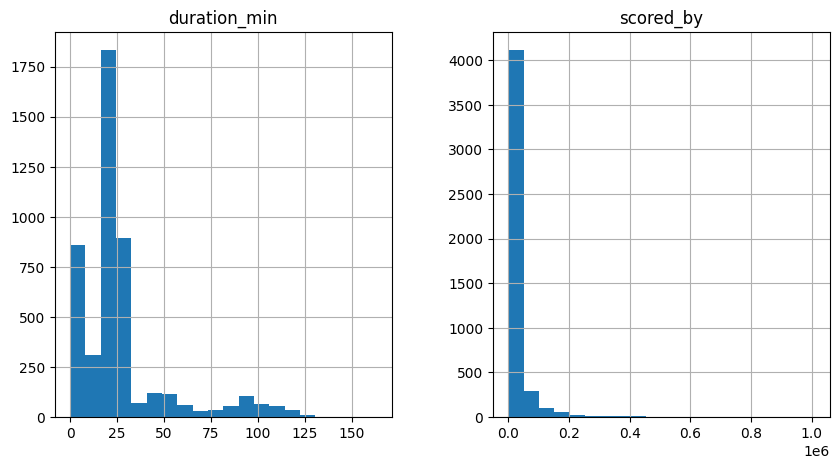

In [17]:
train[best].hist(figsize = (10,5), bins = 20) # vemos la distribución de las variables continuas que quedaron, si no quieres que te salga en mensaje solo agrega al final ; 

In [18]:
for v,li,ls in train[best].describe(percentiles=[0.01,0.99]).T[['1%','99%']].reset_index().values.tolist(): # creamos una lista con los valores de los percentiles 1% y 99% de cada variable continua
    train[f'ex_{v}'] = ((train[v]<li)|(train[v]>ls)).astype(int)    # creamos una nueva variable que es 1 si el valor de la variable continua es menor al percentil 1% o mayor al percentil 99% y 0 si no lo es
train['ex_'] = train.filter(like='ex_').max(axis=1)                 # creamos una nueva variable que es 1 si alguna de las variables continuas tiene un valor menor al percentil 1% o mayor al percentil 99% y 0 si no lo es 
train['ex_'].value_counts(1)                                        # vemos el porcentaje de valores 1 y 0 de la variable ex_ (es 0.0 por que no hay eso es bueno)

0    0.963574
1    0.036426
Name: ex_, dtype: float64

In [19]:
train = train[train['ex_']==0].reset_index(drop=True)       # eliminamos los datos que tienen valores atípicos en las variables continuas
train = train.drop(train.filter(like='ex_').columns,axis=1) # eliminamos las variables ex_ del dataset de train

array([[<AxesSubplot: title={'center': 'duration_min'}>,
        <AxesSubplot: title={'center': 'scored_by'}>]], dtype=object)

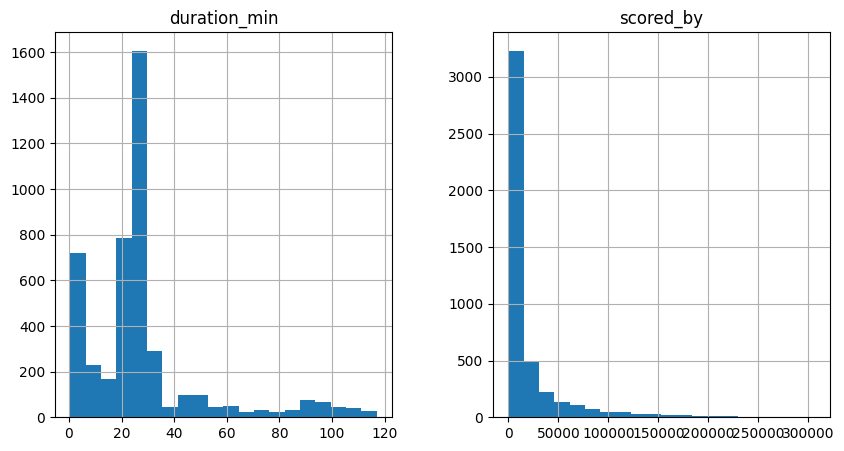

In [20]:
train[best].hist(figsize=(10,5),bins=20) # vemos la distribución de las variables continuas que quedaron, si no quieres que te salga en mensaje solo agrega al final ;

### Discreto

#### Normalización

In [21]:
for v in vard: # recorremos las variables discretas
    train[v].fillna('MISSING',inplace=True)     # rellenamos los valores nulos con la cadena 'MISSING'

In [22]:
freq(train,vard) # vemos la frecuencia de cada valor de cada variable discreta

****Tabla de frecuencias  rating  ***


                                  FA        FR   FAA       FRA
G - All Ages                     675  0.150100   675  0.150100
None                              54  0.012008   729  0.162108
PG - Children                    326  0.072493  1055  0.234601
PG-13 - Teens 13 or older       2320  0.515899  3375  0.750500
R - 17+ (violence & profanity)   512  0.113854  3887  0.864354
R+ - Mild Nudity                 378  0.084056  4265  0.948410
Rx - Hentai                      232  0.051590  4497  1.000000




****Tabla de frecuencias  status  ***


                    FA        FR   FAA       FRA
Currently Airing   120  0.026684   120  0.026684
Finished Airing   4377  0.973316  4497  1.000000




****Tabla de frecuencias  type  ***


           FA        FR   FAA       FRA
Movie     543  0.120747   543  0.120747
Music      67  0.014899   610  0.135646
ONA       286  0.063598   896  0.199244
OVA       968  0.215255  1864  0.414499
Special   620  0.137870

In [23]:
mapa_norm = list(map(lambda v:normalizar(train,v),vard)) # creamos una lista con los valores de cada variable discreta normalizados
for v, mapa in mapa_norm: # recorremos la lista
    train[f'n_{v}'] = train[v].replace(mapa) # creamos una nueva variable que es el valor de la variable discreta normalizado
varn = [f'n_{v}' for v in vard] # creamos una lista con el nombre de las variables discretas normalizadas
freq(train,varn) # vemos la frecuencia de cada valor de cada variable discreta normalizada

****Tabla de frecuencias  n_rating  ***


                                  FA        FR   FAA       FRA
G - All Ages                     675  0.150100   675  0.150100
PG - Children                    326  0.072493  1001  0.222593
PG-13 - Teens 13 or older       2374  0.527907  3375  0.750500
R - 17+ (violence & profanity)   512  0.113854  3887  0.864354
R+ - Mild Nudity                 378  0.084056  4265  0.948410
Rx - Hentai                      232  0.051590  4497  1.000000




****Tabla de frecuencias  n_status  ***


                   FA   FR   FAA  FRA
Finished Airing  4497  1.0  4497  1.0




****Tabla de frecuencias  n_type  ***


           FA        FR   FAA       FRA
Movie     543  0.120747   543  0.120747
ONA       286  0.063598   829  0.184345
OVA       968  0.215255  1797  0.399600
Special   620  0.137870  2417  0.537469
TV       2080  0.462531  4497  1.000000




****Tabla de frecuencias  n_source  ***


                FA        FR   FAA       FRA
Game           298  

####  Varianza cero (Unarias)

In [24]:
unarias = [v for v in varn if len(train[v].unique())==1] # obtenemos las variables discretas normalizadas que solo tienen un valor y las guardamos en una lista
varn = [v for v in varn if v not in unarias] # eliminamos las variables discretas normalizadas que solo tienen un valor de la lista de variables discretas normalizadas
len(varn) # vemos el numero de variables discretas normalizadas que quedaron (lee cuenta)

5

## Espacios 

### Natural $\mathcal{X}$

In [25]:
X = train[best].copy() # creamos un nuevo dataset con las variables continuas que quedaron
oh = OneHotEncoder(sparse=True, handle_unknown='ignore', drop='if_binary') # creamos un objeto de la clase OneHotEncoder (codifica las variables discretas normalizadas)
oh.fit(train[varn]) # ajustamos el objeto a las variables discretas normalizadas del dataset de train
X = pd.concat([X, pd.DataFrame(oh.transform(train[varn]).toarray(), 
              columns=oh.get_feature_names_out())], axis=1) # concatenamos las variables discretas normalizadas codificadas al dataset de variables continuas
X.head() # vemos los primeros datos del dataset


c:\Users\oscar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



,duration_min,scored_by,n_rating_G - All Ages,n_rating_PG - Children,n_rating_PG-13 - Teens 13 or older,n_rating_R - 17+ (violence & profanity),n_rating_R+ - Mild Nudity,n_rating_Rx - Hentai,n_type_Movie,n_type_ONA,n_type_OVA,n_type_Special,n_type_TV,n_source_Game,n_source_Light novel,n_source_Manga,n_source_Original,n_source_Otros,n_source_Visual novel,n_producer_Otros,n_studio_Toei Animation
0,110.0,4526,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,24.0,2050,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.0,22,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,24.0,41014,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,90.0,677,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Espacio de híper-caja $\mathcal{X}_{[0,1]}$

In [26]:
sc01 = MinMaxScaler() # creamos un objeto de la clase MinMaxScaler (escala las variables continuas entre 0 y 1)
sc01.fit(X) # ajustamos el objeto a las variables continuas del dataset de train
X01 = pd.DataFrame(sc01.transform(X),columns=X.columns) # escalamos las variables continuas del dataset de train y lo guardamos en un nuevo dataset
X01.head() # vemos los primeros datos del dataset

,duration_min,scored_by,n_rating_G - All Ages,n_rating_PG - Children,n_rating_PG-13 - Teens 13 or older,n_rating_R - 17+ (violence & profanity),n_rating_R+ - Mild Nudity,n_rating_Rx - Hentai,n_type_Movie,n_type_ONA,n_type_OVA,n_type_Special,n_type_TV,n_source_Game,n_source_Light novel,n_source_Manga,n_source_Original,n_source_Otros,n_source_Visual novel,n_producer_Otros,n_studio_Toei Animation
0,0.939914,0.014750,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.201717,0.006667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.030043,0.000046,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.201717,0.133875,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.768240,0.002184,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Espacio de componentes principales $\mathcal{X}_p$

In [27]:
pipe = make_pipeline(StandardScaler(),PCA(n_components=0.95),MinMaxScaler()) # creamos un objeto de la clase Pipeline (escala las variables continuas, reduce la dimensionalidad y escala las variables continuas entre 0 y 1)
pipe.fit(X) # ajustamos el objeto a las variables continuas del dataset de train
Xp = pd.DataFrame(pipe.transform(X)) # escalamos las variables continuas del dataset de train, reducimos la dimensionalidad y escalamos las variables continuas entre 0 y 1 y lo guardamos en un nuevo dataset
print(pipe.steps[1][1].explained_variance_ratio_.cumsum()) # vemos la varianza explicada por cada componente principal
Xp.head() # vemos los primeros datos del dataset

[0.10809121 0.20750356 0.30093377 0.37959036 0.44645423 0.51091111
 0.57401686 0.63251721 0.68613497 0.73779345 0.78396997 0.82615856
 0.86617351 0.90289098 0.93627289 0.96603215]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.474987,0.607108,0.760449,0.453768,0.876967,0.121911,0.470986,0.324771,0.601221,0.408339,0.245362,0.348566,0.530134,0.373679,0.387930,0.255058
1,0.258135,0.463745,0.288668,0.470477,0.760947,0.546094,0.196840,0.325049,0.513362,0.393785,0.455687,0.194241,0.286562,0.695985,0.344493,0.268876
2,0.438695,0.925856,0.094126,0.422383,0.307340,0.170950,0.527664,0.433307,0.466759,0.192504,0.653519,0.368085,0.584636,0.362884,0.429029,0.363892
3,0.325431,0.265627,0.367818,0.329002,0.129756,0.349556,0.304058,0.364875,0.802394,0.543777,0.456420,0.368675,0.634466,0.495061,0.484088,0.263790
4,0.655488,0.581838,0.517950,0.461149,0.215898,0.242748,0.312477,0.527452,0.498303,0.460664,0.460474,0.278543,0.191522,0.258213,0.476091,0.406789


In [28]:
Xp.corr().round(2) # vemos la matriz de correlación del dataset de variables continuas, discretas normalizadas y discretas codificadas

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0
1,0.0,1.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0
2,-0.0,-0.0,1.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0
3,0.0,-0.0,0.0,1.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
4,-0.0,-0.0,-0.0,0.0,1.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0
5,0.0,0.0,0.0,-0.0,0.0,1.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0
6,0.0,-0.0,-0.0,-0.0,-0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0
7,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,1.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0
8,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,1.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0
9,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,1.0,-0.0,0.0,0.0,0.0,0.0,-0.0


## Aprendizaje

### Entrenamiento con híperparametrización

In [29]:
mod = SVC() # creamos un objeto de la clase SVC (modelo de clasificación)
hp = {'C': np.arange(0.1, 2, 0.1), 'kernel': ['linear', 'rbf', 'poly'], 'gamma': [ 
    'scale', 'auto'], 'probability': [True],'degree':[2,3,4,5]}        # creamos un diccionario con los hiperparámetros que queremos probar en el modelo de clasificación (C, kernel, gamma, probability y degree)
print(reduce(lambda x,y:x*y,[len(hp[k]) for k in hp.keys()]))          # vemos el número de combinaciones de hiperparámetros que vamos a probar 
grid = RandomizedSearchCV(mod, hp, cv=5, n_iter=20, n_jobs=-1, verbose=1,scoring='roc_auc') # creamos un objeto de la clase RandomizedSearchCV (busca la mejor combinación de hiperparámetros)
grid.fit(Xp, train['target'])     # ajustamos el objeto a las variables continuas, discretas normalizadas y discretas codificadas del dataset de train y el target
print(grid.best_params_,grid.best_score_) # vemos los mejores hiperparámetros y el score del modelo de clasificación con los mejores hiperparámetros
mod = grid.best_estimator_        # creamos un objeto de la clase SVC con los mejores hiperparámetros (modelo de clasificación) 
mod.fit(Xp, train['target'])       # ajustamos el objeto a las variables continuas, discretas normalizadas y discretas codificadas del dataset de train y el target (modelo de clasificación)

456
Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'probability': True, 'kernel': 'poly', 'gamma': 'auto', 'degree': 2, 'C': 0.1} 0.8285395613467454


SVC(C=0.1, degree=2, gamma='auto', kernel='poly', probability=True)

In [30]:
roc_auc_score(train['target'],mod.predict_proba(Xp)[:,1]) # vemos el score del modelo de clasificación con los mejores hiperparámetros

0.8134590302945344

<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

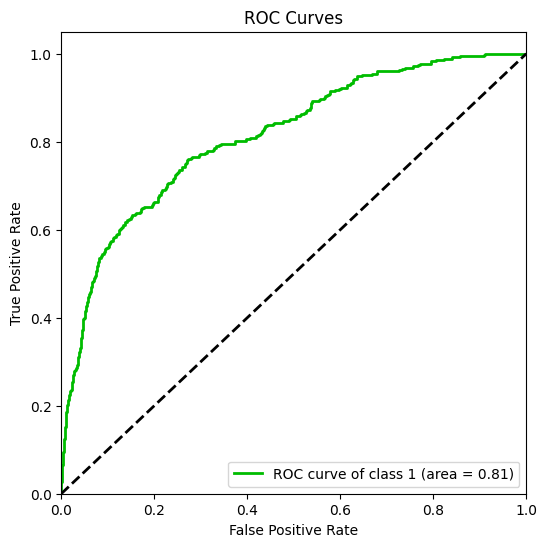

In [31]:
plot_roc(train['target'], mod.predict_proba(Xp), plot_macro=False,
         plot_micro=False, figsize=(6, 6), classes_to_plot=[1])     # vemos la curva ROC del modelo de clasificación con los mejores hiperparámetros y el área bajo la curva 


### Validación del modelo

In [32]:
for v, mapa in mapa_norm: # recorremos la lista
    valid[f'n_{v}'] = valid[v].replace(mapa) # creamos una nueva variable que es el valor de la variable discreta normalizado

In [33]:
Xv = valid[best].copy() # creamos un nuevo dataset con las variables continuas que quedaron
Xv = pd.concat([Xv, pd.DataFrame(oh.transform(valid[varn]).toarray(),
              columns=oh.get_feature_names_out())], axis=1) # concatenamos las variables discretas normalizadas codificadas al dataset de variables continuas
Xv.head() # vemos los primeros datos del dataset 


c:\Users\oscar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning:

Found unknown categories in columns [3, 4] during transform. These unknown categories will be encoded as all zeros



,duration_min,scored_by,n_rating_G - All Ages,n_rating_PG - Children,n_rating_PG-13 - Teens 13 or older,n_rating_R - 17+ (violence & profanity),n_rating_R+ - Mild Nudity,n_rating_Rx - Hentai,n_type_Movie,n_type_ONA,n_type_OVA,n_type_Special,n_type_TV,n_source_Game,n_source_Light novel,n_source_Manga,n_source_Original,n_source_Otros,n_source_Visual novel,n_producer_Otros,n_studio_Toei Animation
0,24.0,181978,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,24.0,18243,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,23.0,235728,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,96.0,7014,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,22,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [34]:
Xvp = pd.DataFrame(pipe.transform(Xv)) # escalamos las variables continuas del dataset de valid, reducimos la dimensionalidad y escalamos las variables continuas entre 0 y 1 y lo guardamos en un nuevo dataset

<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

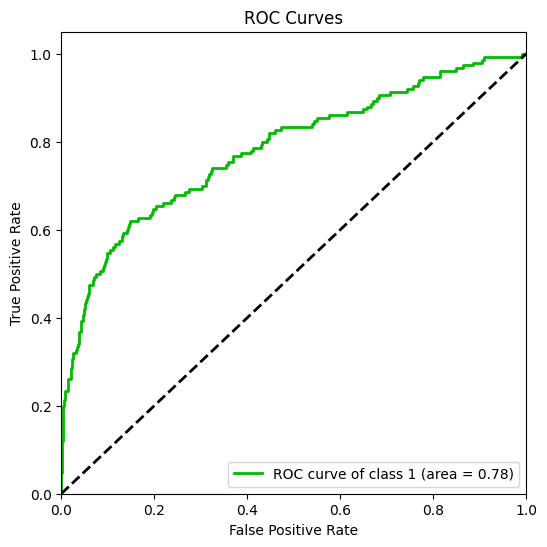

In [35]:
plot_roc(valid['target'], mod.predict_proba(Xvp), plot_macro=False,
         plot_micro=False, figsize=(6, 6), classes_to_plot=[1])    # vemos la curva ROC del modelo de clasificación con los mejores hiperparámetros y el área bajo la curva 


(array([1863.,   73.,   16.,   18.,   31.]),
 array([0.00182303, 0.20145843, 0.40109382, 0.60072921, 0.80036461,
        1.        ]),
 <BarContainer object of 5 artists>)

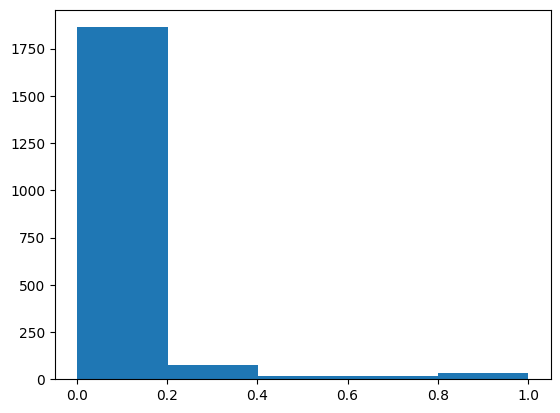

In [36]:
plt.hist(mod.predict_proba(Xvp)[:,1],bins=5) # vemos la distribución de las probabilidades predichas por el modelo de clasificación con los mejores hiperparámetros

## Reporte del modelo

In [37]:
train['r_proba'] = pd.cut(mod.predict_proba(Xp)[:,1],bins=np.arange(0,1.2,0.2)).astype(str) # creamos una nueva variable que es el valor de la variable discreta normalizado
valid['r_proba'] = pd.cut(mod.predict_proba(Xvp)[:,1],bins=np.arange(0,1.2,0.2)).astype(str) # creamos una nueva variable que es el valor de la variable discreta normalizado

In [38]:
aux = pd.concat([train[['r_proba','target']].assign(muestra='train').assign(n=1),
valid[['r_proba','target']].assign(muestra='valid').assign(n=1)],ignore_index=True)
# concatenamos los datasets de train y valid 
#  creamos una nueva variable que es el valor de la variable discreta normalizado 
#  otra que es el target y otra que es la muestra 

In [39]:
aux.groupby(['r_proba','muestra','target']).agg({'n':'count'}).reset_index().to_clipboard(index=False) # vemos la distribución de las probabilidades predichas por el modelo de clasificación con los mejores hiperparámetros

## Ejemplos

In [40]:
valid[valid['r_proba']=='(0.8, 1.0]'].sort_values(by='title_english')['title_english'].to_clipboard(index=False)
# vemos las películas que el modelo de clasificación con los mejores hiperparámetros predice que tienen más de un 80% de probabilidades de ser de acción

In [41]:
valid[valid['r_proba']=='(0.6, 0.8]'].sort_values(by='title_english')
# vemos las películas que el modelo de clasificación con los mejores hiperparámetros predice que tienen entre un 60% y un 80% de probabilidades de ser de acción

,anime_id,title,title_english,episodes,members,scored_by,favorites,aired_from_year,duration_min,rating,status,type,source,producer,studio,genre,target,n_rating,n_status,n_type,n_source,n_producer,n_studio,n_genre,r_proba
1271,16067,Nagi no Asukara,A Lull in the Sea,26,312990,132252,7145,2013.0,23.0,PG-13 - Teens 13 or older,Finished Airing,TV,Original,"Geneon Universal Entertainment, Sotsu, Animax, Rondo Robe, Showgate, Infinite",P.A. Works,"Drama, Fantasy, Romance",1,PG-13 - Teens 13 or older,Finished Airing,TV,Original,"Geneon Universal Entertainment, Sotsu, Animax, Rondo Robe, Showgate, Infinite",Otros,"Drama, Fantasy, Romance","(0.6, 0.8]"
1342,47,Akira,AKIRA,1,310133,190829,5029,1988.0,124.0,R+ - Mild Nudity,Finished Airing,Movie,Manga,"Mainichi Broadcasting System, Kodansha, Toho",Tokyo Movie Shinsha,"Action, Military, Sci-Fi, Adventure, Horror, Supernatural",1,R+ - Mild Nudity,Finished Airing,Movie,Manga,"Mainichi Broadcasting System, Kodansha, Toho",Otros,"Action, Military, Sci-Fi, Adventure, Horror, Supernatural","(0.6, 0.8]"
1873,22729,Aldnoah.Zero,Aldnoah.Zero,12,323603,184307,3415,2014.0,23.0,R - 17+ (violence & profanity),Finished Airing,TV,Original,"Aniplex, Movic, Nitroplus, Houbunsha, MAGES., Tokyo MX, Asahi Broadcasting, BS11","A-1 Pictures, TROYCA","Action, Military, Sci-Fi, Mecha",0,R - 17+ (violence & profanity),Finished Airing,TV,Original,Otros,Otros,Otros,"(0.6, 0.8]"
21,4898,Kuroshitsuji,Black Butler,24,563987,297047,19614,2008.0,24.0,R - 17+ (violence & profanity),Finished Airing,TV,Manga,"Aniplex, Square Enix, Yomiko Advertising, Mainichi Broadcasting System, Movic, Trinity Sound",A-1 Pictures,"Action, Comedy, Demons, Fantasy, Historical, Shounen, Supernatural",0,R - 17+ (violence & profanity),Finished Airing,TV,Manga,"Aniplex, Square Enix, Yomiko Advertising, Mainichi Broadcasting System, Movic, Trinity Sound",Otros,"Action, Comedy, Demons, Fantasy, Historical, Shounen, Supernatural","(0.6, 0.8]"
1508,552,Digimon Adventure,Digimon: Digital Monsters,54,233529,150537,3625,1999.0,24.0,PG - Children,Finished Airing,TV,Original,"Yomiko Advertising, Fuji TV",Toei Animation,"Action, Adventure, Comedy, Fantasy, Kids",0,PG - Children,Finished Airing,TV,Original,Otros,Toei Animation,Otros,"(0.6, 0.8]"
1739,237,Eureka Seven,Eureka Seven,50,305772,127472,7934,2005.0,24.0,PG-13 - Teens 13 or older,Finished Airing,TV,Original,"Aniplex, Bandai Visual, Kadokawa Shoten, Mainichi Broadcasting System, Bandai, Ashi Production, Sony Music Entertainment, Bandai Namco Games, Hakuhodo DY Media Partners, Bandai Channel, USEN",Bones,"Sci-Fi, Adventure, Drama, Romance, Mecha",1,PG-13 - Teens 13 or older,Finished Airing,TV,Original,"Aniplex, Bandai Visual, Kadokawa Shoten, Mainichi Broadcasting System, Bandai, Ashi Production, Sony Music Entertainment, Bandai Namco Games, Hakuhodo DY Media Partners, Bandai Channel, USEN",Otros,"Sci-Fi, Adventure, Drama, Romance, Mecha","(0.6, 0.8]"
1876,3785,Evangelion: 3.0 You Can (Not) Redo,Evangelion: 3.0 You Can (Not) Redo,1,176857,96735,907,2012.0,96.0,PG-13 - Teens 13 or older,Finished Airing,Movie,Original,"Gainax, KlockWorx",Khara,"Action, Sci-Fi, Mecha",0,PG-13 - Teens 13 or older,Finished Airing,Movie,Original,Otros,Otros,Otros,"(0.6, 0.8]"
706,22043,Fairy Tail (2014),Fairy Tail Series 2,102,402527,185951,9325,2014.0,24.0,PG-13 - Teens 13 or older,Finished Airing,TV,Manga,"TV Tokyo, Dentsu","A-1 Pictures, Bridge","Action, Adventure, Comedy, Fantasy, Magic, Shounen",1,PG-13 - Teens 13 or older,Finished Airing,TV,Manga,Otros,Otros,Otros,"(0.6, 0.8]"
1045,11741,Fate/Zero 2nd Season,Fate/Zero Season 2,12,500077,313188,10953,2012.0,24.0,R - 17+ (violence & profanity),Finished Airing,TV,Novel,"Aniplex, Nitroplus, Seikaisha, Notes",ufotable,"Action, Supernatural, Magic, Fantasy",1,R - 17+ (violence & profanity),Finished Airing,TV,Otros,"Aniplex, Nitroplus, Seikaisha, Notes",Otros,Otros,"(0.6, 0.8]"
34,43,Ghost in the Shell,Ghost in the Shell,1,329663,182809,7755,1995.0,82.0,R+ - Mild Nudity,F

# $\theta$